# **ANNDA-LAB_1**

**Authors:**

Hamza Benjelloun,  
Omar Benchekroun,  
Nadir Ait lahmouch


---
# **Assignement - Part I**



## Data generation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
def shuffle_data(x,y):
  indexes = list(range(x.shape[1]))
  random.shuffle(indexes)
  return x[:, indexes], y[indexes]


def generate_data(N, mean_A, mean_B, sigma_A, sigma_B):
  class_A_x, class_A_y = np.random.normal(0,1,N) * sigma_A + mean_A[0], np.random.normal(0,1,N) * sigma_A + mean_A[1]

  #data as asked in the lab
  # class_A_x = np.array(np.concatenate((np.random.normal(0, sigma_A, int(N / 2)) * sigma_A - mean_A[0],
  #                                      np.random.normal(0, sigma_A, int(N / 2)) * sigma_A + mean_A[0])))
  # class_A_y = np.random.normal(0,1,N) * sigma_A + mean_A[1]
  

  class_B_x, class_B_y = np.random.normal(0,1,N) * sigma_B + mean_B[0], np.random.normal(0,1,N) * sigma_B + mean_B[1]

  x_A = np.vstack([class_A_x, class_A_y])
  x_B = np.vstack([class_B_x, class_B_y])

  #last example drop 80% + and 20% -
  # x_A, test_A = process_classA(x_A)

  #shuffle
  indexes_A = list(range(x_A.shape[1]))
  indexes_B = list(range(x_B.shape[1]))
  random.shuffle(indexes_A)
  random.shuffle(indexes_B)
  x_A = x_A[:, indexes_A]
  x_B = x_B[:, indexes_B]

  x = np.hstack((x_A, x_B))


  #adding bias
  x = np.vstack((x, np.ones(x_A.shape[1] + x_B.shape[1])))
  # generate labels
  y = np.concatenate((np.ones(x_A.shape[1]), np.zeros(x_B.shape[1])))

  #shuffle data
  # indexes = list(range(x.shape[1]))
  # random.shuffle(indexes)
  # x = x[:, indexes]
  # y = y[indexes]

  return x,y

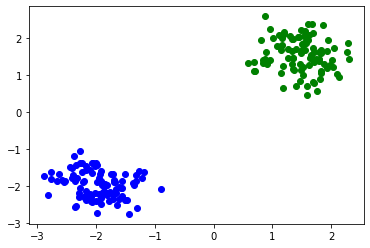

In [6]:
N = 100
# Data first part
mean_A = [1.5, 1.5]
mean_B = [-2, -2]
sigma_A = 0.4
sigma_B = 0.4

# Data given in the lab
# mean_A = [1, 0.3]
# mean_B = [0, -0.1]
# sigma_A = 0.2
# sigma_B = 0.3

x, y = generate_data(N, mean_A, mean_B, sigma_A, sigma_B)
class_A_x, class_A_y = x[0][y == 1], x[1][y == 1]
class_B_x, class_B_y = x[0][y == 0], x[1][y == 0]
#Plot
plt.scatter(class_A_x, class_A_y, color='green')
plt.scatter(class_B_x, class_B_y, color='blue')
plt.show()


## **Learning alogrithms**

In [7]:
def init_weights(n, m=1, s=1):
  # n is the number of the input patterns (columns)
  # m is the number of the output (rows)
  # np.random.seed(s)
  if m == 1:
    return np.random.normal(0, 1, n)
  else:
    W = np.zeros((m, n))
    for i in range(m):
      W[i] = np.random.normal(0, 1, n)
    return W 

def perceptron_learning(X, y, lr, n_epoch):
  # initialization of weights
  W = init_weights(X.shape[0])
  errors = y - (W @ X > 0)
  cpt = 1
  epoch = 1
  while (n_epoch > cpt) and (1 in errors or -1 in errors):
    # find missclassified patterns
    index_missclass = np.where(errors**2 == 1)[0]
    error_missclass = errors[index_missclass]
    X_missclass = X[:, index_missclass]
    # update weights w_i = w_i + lr*error
    W = W + lr*X_missclass@error_missclass
    errors = y - (W @ X > 0)
    epoch += 1
  return W


In [8]:
def delta_rule_training(X, y, lr=0.001, n_epoch=20, mode='batch'):
  W = init_weights(X.shape[0])
  mse = []

  if mode == 'batch':
    for epoch in range(n_epoch):
      delta_W = -lr * (W @ X - y) @ X.T
      W = W + delta_W
      mse += [mean_squared_error(X, y, W)]

  if mode == 'seq':
    for epoch in range(n_epoch):
      for i in range(len(y)):
        delta_W = -lr * (W @ X[:, i] - y[i]) * X[:, i]
        W = W + delta_W
      mse += [mean_squared_error(X, y, W)]

  return W, mse


## Errors and visualization

In [9]:
def predict(X, W):
  return (W@X>0).astype(int)

def error_ratio(X, y, W):
  y_pred = predict(X, W)
  errors = np.sum(y_pred != y)
  return errors / len(y)

def mean_squared_error(X, y, W):
  return (1 / 2) * np.sum((y - W @ X)**2)

#plot decision boundary
def abline(W):
    slope, intercept = -W[0]/W[1], -W[2]/W[1]
    # slope, intercept = -W[0]/W[1], 0
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='red')
    plt.show()


def plot_errors(err, nb_epochs):
    x = np.arange(1, nb_epochs + 1, 1)
    plt.plot(x, err)
    plt.title('Misclassified errors of classification depending on number of epochs')
    plt.xlabel('Number of epochs')
    plt.ylabel('Errors rate')
    plt.show()

## **Tests on the algos**

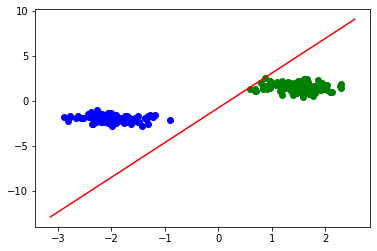

In [10]:
#test perceptron learning
W = perceptron_learning(x, y, 0.001, 100)
plt.scatter(class_A_x, class_A_y, color='green')
plt.scatter(class_B_x, class_B_y, color='blue')
abline(W)
plt.show()

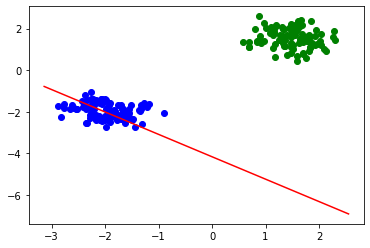

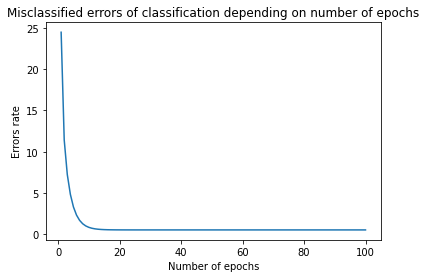

In [11]:
#test delta rule

W_d, mse = delta_rule_training(x, y, 0.001, 100, mode='batch')
plt.scatter(class_A_x, class_A_y, color='green')
plt.scatter(class_B_x, class_B_y, color='blue')
abline(W_d)
plt.show()
plot_errors(mse, 100)

### Find best learning rate 

In [12]:
def find_best_lr(X, y, training):
  lr_range = np.arange(0.001, 1, 0.001)
  err = []
  for lr in lr_range:
    if training == "delta":
      W = delta_rule_training(x, y, lr, 100, mode='batch')[0]
    else:
      W = perceptron_learning(X, y, lr=lr, n_epoch=20)

    error = error_ratio(X, y, W)
    err += [error]
  return lr_range[np.argmin(err)]

In [13]:
import timeit

start = timeit.default_timer()

x, y = generate_data(N, mean_A, mean_B, sigma_A, sigma_B)

best_lr = []
for i in range(100):
  best_lr.append(find_best_lr(x,y, "delta"))

print("Mean=",np.mean(best_lr))
print("Std=",np.std(best_lr))

stop = timeit.default_timer()
print('Time: ', stop - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in matmul
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in matmul
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in matmul
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: inva

KeyboardInterrupt: ignored

In [ ]:
# Q2
# Comparison of convergence between batch and seq
N = 100
# Data first part
mean_A = [1.5, 1.5]
mean_B = [-2, -2]
sigma_A = 0.4
sigma_B = 0.4

x, y = generate_data(N, mean_A, mean_B, sigma_A, sigma_B)

lr = 0.001
W, scores_batch= delta_rule_training(x, y, lr, 50, mode='batch')
W, scores_seq= delta_rule_training(x, y, lr, 50, mode='seq')

x = range(1, len(scores_batch) + 1)
plt.plot(x[3:], scores_batch[3:], label='Batch learning', color='red')
plt.plot(x[3:], scores_seq[3:], label='Sequential learning', color='green')
plt.legend(loc='best')
plt.title('Convergence of the Delta rule with same lr for both')
plt.xlabel('Number of epochs')
plt.ylabel('Mean-squared error')


### Influence of initialization

In [ ]:
scores = []
lr = 0.0001
mean_A = [1.5, 1.5]
mean_B = [-2, -2]
sigma_A = 0.4
sigma_B = 0.4

x, y = generate_data(N, mean_A, mean_B, sigma_A, sigma_B)

for i in range(5):
  scores = delta_rule_training(x, y, lr=lr, mode='batch', n_epoch=200)[1]
  X = range(1, len(scores) + 1)
  plt.plot(X, scores)
plt.title('Delta rule computed with different random weights')
plt.xlabel('Number of epochs')
plt.ylabel('Mean-squared error')


## **Classification of samples that are not linearly separable**


In [ ]:
def splitData(x, y, A_Ratio=0.0, B_Ratio=0.0):
    n = 100
    test_A = x[:, :int(n * A_Ratio)]
    training_A = x[:, int(n * A_Ratio):n]
    test_B = x[:, n: n + int((B_Ratio * n))]
    training_B = x[:, n + int((B_Ratio * n)): n * 2]

    test_A_y = y[0:int(A_Ratio * n):1]
    training_A_y = y[int(A_Ratio * n):n:1]
    test_B_y = y[n:n + int(B_Ratio * n):1]
    training_B_y = y[n + int(B_Ratio * n):2 * n:1]

    if B_Ratio == 0:
        test_x = test_A
        test_y = test_A_y
    elif A_Ratio == 0:
        test_x = test_B
        test_y = test_B_y
    else:
        test_x = np.concatenate((test_A, test_B), axis=1)
        test_y = np.concatenate((test_A_y, test_B_y))

    training_x = np.concatenate((training_A, training_B), axis=1)
    training_y = np.concatenate((training_A_y, training_B_y))

    return training_x, training_y, test_x, test_y

def calculate_accuracy(W, test_x, test_y):
  test_A_x = [[],[],[]]
  test_B_x = [[],[],[]]
  test_A_y = []
  test_B_y = []
  for i, e in enumerate(test_y):
    if e == 1:
      test_A_y.append(e)
      test_A_x[0].append(test_x[0][i])
      test_A_x[1].append(test_x[1][i])
      test_A_x[2].append(test_x[2][i])
    else:
      test_B_y.append(e)
      test_B_x[0].append(test_x[0][i])
      test_B_x[1].append(test_x[1][i])
      test_B_x[2].append(test_x[2][i])       
    
  return 1-error_ratio(test_A_x, test_A_y, W), 1-error_ratio(test_B_x, test_B_y, W)


In [ ]:
def process_classA(classA):
    _, n = np.shape(classA)

    # separate classA in <0 and >0
    classA_minus = classA[:, (classA[1,:] < 0)]
    classA_plus = classA[:, (classA[1,:] > 0)]

    #drop 20% of classA_minus
    test_A_minus = classA_minus[:, :int(n * 0.2)]
    training_A_minus = classA_minus[:, int(n * 0.2):n]


    #drop 80% of classA_plus
    test_A_plus = classA_plus[:, :int(n * 0.8)]
    training_A_plus = classA_plus[:, int(n * 0.8):n]


    classA = np.concatenate((training_A_plus, training_A_minus), axis=1)
    test_A = np.concatenate((test_A_plus, test_A_minus), axis=1) 
    return classA, test_A



In [ ]:
x_t, y_t, test_x, test_y = splitData(x, y, 0.25, 0.25)

class_A_x, class_A_y = x_t[0][y_t == 1], x_t[1][y_t == 1]
class_B_x, class_B_y = x_t[0][y_t == 0], x_t[1][y_t == 0]
class_At_x, class_At_y = test_x[0][test_y == 1], test_x[1][test_y == 1]
class_Bt_x, class_Bt_y = test_x[0][test_y == 0], test_x[1][test_y == 0]


W_d, errors= delta_rule_training(x, y, 0.001, 100, mode='batch')
accA, accB = calculate_accuracy(W_d, test_x, test_y)
print("accuracy_A=", accA)
print("accuracy_B=", accB)
# W = perceptron_learning(x_t, y_t, 0.001, 20)
plt.scatter(class_A_x, class_A_y, color='green')
plt.scatter(class_B_x, class_B_y, color='blue')
plt.scatter(class_At_x, class_At_y, color='lightgreen')
plt.scatter(class_Bt_x, class_Bt_y, color='cyan')
abline(W_d)
# abline(W)
plt.show()


## **Two-layer perceptron**

In [14]:
def activation(x):
  return 2/(1 + np.exp(-x)) - 1

def activation_derivate(activated_x):
  return 0.5*((1+activated_x)*(1-activated_x))


def backpropagation(X, y, n_hidden, n_epochs, momentum, lr):
  # initializate weights
  #delta_weights1, delta_weights2 = 0, 0

  W1 = init_weights(X.shape[0], n_hidden)
  if(n_hidden == 1):
    W1 = W1.reshape(1,X.shape[0])
  W2 = init_weights(n_hidden + 1)
  W2 = W2.reshape(1, n_hidden + 1)
  delta_weights1=np.ones(np.shape(W1))
  delta_weights2=np.ones(np.shape(W2))
  for i in range(n_epochs):
    # Forward pass
    hin = W1 @ X
    hout = activation(hin)
    #add Bias
    hout = np.vstack((hout, np.ones(hout.shape[1])))
    oin = W2 @ hout
    out = activation(oin)
    # Backward pass
    delta_o = (out - y)*activation_derivate(out)
    delta_h = (W2.T @ delta_o)*activation_derivate(hout)
    # remove bias from delta_h
    delta_h = delta_h[range(n_hidden), :]
    # update weights
    delta_weights1 = (delta_weights1*momentum)-(delta_h@X.T)*(1-momentum)
    delta_weights2 = (delta_weights2*momentum)-(delta_o@hout.T)*(1-momentum)
    W1 = W1 + lr * delta_weights1
    W2 = W2 + lr * delta_weights2
  return W1, W2



def forward(X, W1, W2):
  # Forward pass
  hout = activation(W1 @ X)
  #add Bias
  hout = np.vstack((hout, np.ones(hout.shape[1])))
  out = activation(W2 @ hout) 
  return out


def compute_error_training_validation(X, y, n_hidden, n_epochs, momentum, lr, scenario=1):
  MSE_training = []
  MSE_validation = []
  # training
  X_training, y_training, X_validation, y_validation = training_validation(X, y, scenario)
  # initializate weights
  delta_weights1, delta_weights2 = 0, 0
  W1 = init_weights(X_training.shape[0], n_hidden)
  W2 = init_weights(n_hidden + 1)
  W2 = W2.reshape(1, n_hidden + 1)
  for i in range(n_epochs):
    # Forward pass
    hin = W1 @ X_training
    hout = activation(hin)
    #add Bias
    hout = np.vstack((hout, np.ones(hout.shape[1])))
    oin = W2 @ hout
    out = activation(oin)
    # Backward pass
    delta_o = (out - y_training)*activation_derivate(out)
    delta_h = (W2.T @ delta_o)*activation_derivate(hout)
    # remove bias from delta_h
    delta_h = delta_h[range(n_hidden), :]
    # update weights
    delta_weights1 = (delta_weights1*momentum)-(delta_h@X_training.T)*(1-momentum)
    delta_weights2 = (delta_weights2*momentum)-(delta_o@hout.T)*(1-momentum)
    W1 = W1 + lr * delta_weights1
    W2 = W2 + lr * delta_weights2
    #compute MSE_training
    MSE_training.append(np.mean((out -y_training)**2))
    #compute MSE_validation
    out_validation = forward(X_validation, W1, W2)
    MSE_validation.append(np.mean((out_validation -y_validation)**2))
  return MSE_training, MSE_validation


def training_validation(X, y, scenario=1):
  classA_index = np.where(y == 1)[0]
  classB_index = np.where(y == 0)[0]
  random.shuffle(classA_index)
  random.shuffle(classB_index)
  if scenario == 1:
    validation_size = 0.25
    n_A = int(classA_index.shape[0]*validation_size)
    n_B = int(classB_index.shape[0]*validation_size)
    index_validation = np.append(classA_index[:n_A], classB_index[:n_B])
    index_training = list(set(range(X.shape[1])) - set(index_validation))
  elif scenario == 2:
    validation_size = 0.5
    n_A = int(classA_index.shape[0] * validation_size)
    index_validation = classA_index[:n_A]
    index_training = list(set(range(X.shape[1])) - set(index_validation))
  
  elif scenario == 3:
    validation_size = 0.5
    n_B = int(classB_index.shape[0] * validation_size)
    index_validation = classB_index[:n_B]
    index_training = list(set(range(X.shape[1])) - set(index_validation))

  elif scenario == 4:
    classA_index_neg = np.where(np.logical_and(y == 0, X[0, :] < 0))[0]
    classA_index_pos = np.where(np.logical_and(y == 0, X[0, :] > 0))[0]
    n_A_neg = int(classA_index_neg.shape[0]*0.8)
    n_A_pos = int(classA_index_pos.shape[0]*0.2)
    index_validation = np.append(classA_index_neg[:n_A_neg], classA_index_pos[:n_A_pos])
    index_training = list(set(range(X.shape[1])) - set(index_validation))

  X_validation = X[:, index_validation]
  y_validation = y[index_validation]
  X_training = X[:, index_training]
  y_training = y[index_training]
  return X_training, y_training, X_validation, y_validation


Text(0, 0.5, 'Error')

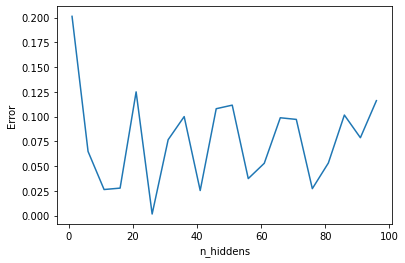

In [15]:
# question 1: the effect the sizeof the hidden layer has on the performance

N = 100
mean_A = [1, 1]
mean_B = [-1, -1]
sigma_A = 0.5
sigma_B = 0.5

x, y = generate_data(N, mean_A, mean_B, sigma_A, sigma_B)
for i in range(y.shape[0]):
  if(y[i]==0):
    y[i] = -1

MSEs = []
accs = []
n_epochs  = 20
lr = 0.001
momentum = 0.9
n_hiddens = range(1, 100, 5)
#n_hiddens = np.arange(2, 50, 1)
for n_hidden in n_hiddens:
  m, a = [], []
  for i in range(20):
    W1, W2 = backpropagation(x, y, n_hidden, n_epochs, momentum, lr)
    y_pred = forward(x, W1, W2)
    y_pred = np.sign(y_pred)
    error = 0.5*(np.mean(y_pred - y)**2)
    acc = np.mean(y_pred == y)
    m.append(error)
    a.append(acc)
  MSEs.append(np.mean(m))
  accs.append(np.mean(a))
plt.plot(n_hiddens, MSEs, label="MSE")
plt.xlabel("n_hiddens")
plt.ylabel("Error")

Text(0, 0.5, 'accuracy')

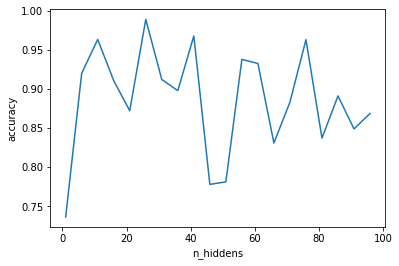

In [16]:
plt.plot(n_hiddens, accs, label = "ratio of misclassifications")
plt.xlabel("n_hiddens")
plt.ylabel("accuracy")

Text(0, 0.5, 'error')

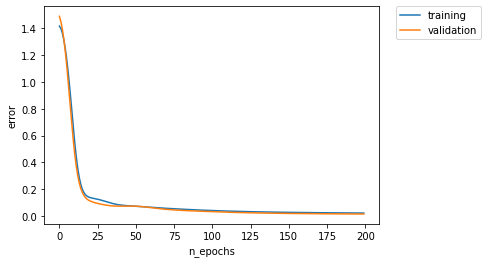

In [17]:

# question 2: 
# 2.1
N = 100
mean_A = [1, 1]
mean_B = [-1, -1]
sigma_A = 0.5
sigma_B = 0.5

x, y = generate_data(N, mean_A, mean_B, sigma_A, sigma_B)

n_hidden = 20
n_epochs  = 200
lr = 0.001
momentum = 0.9

#scenario 1:
MSE_training, MSE_validation = compute_error_training_validation(x, y, n_hidden, n_epochs, momentum, lr, 1)
epochs = np.arange(0, n_epochs)
plt.plot(epochs, MSE_training, label= "training")
plt.plot(epochs, MSE_validation, label="validation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n_epochs")
plt.ylabel("error")

(200,)


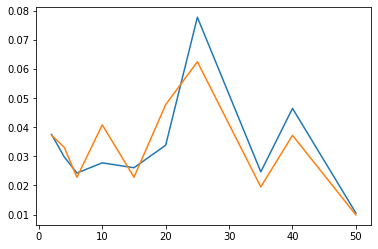

In [18]:
# 2.2
N = 100
mean_A = [1, 1]
mean_B = [-1, -1]
sigma_A = 0.5
sigma_B = 0.5


x, y = generate_data(N, mean_A, mean_B, sigma_A, sigma_B)
print(y.shape)
n_hidden = 20
n_epochs  = 200
lr = 0.001
momentum = 0.9
n_hiddens = [2, 4, 6, 10, 15, 20, 25, 35, 40, 50]

#scenario 1:
MSE_training_hidden = []
MSE_validation_hidden = []

for n_hidden in n_hiddens:
  MSE_training, MSE_validation = compute_error_training_validation(x, y, n_hidden, n_epochs, momentum, lr)
  MSE_training_hidden.append(MSE_training[-1])
  MSE_validation_hidden.append(MSE_validation[-1])

plt.plot(n_hiddens, MSE_training_hidden)
plt.plot(n_hiddens, MSE_validation_hidden)


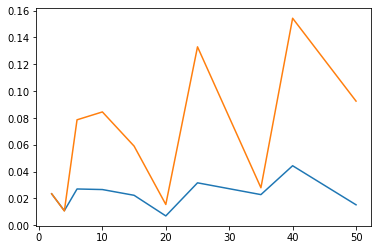

In [19]:
# 2.2
N = 100
mean_A = [1, 1]
mean_B = [-1, -1]
sigma_A = 0.5
sigma_B = 0.5


x, y = generate_data(N, mean_A, mean_B, sigma_A, sigma_B)

MSE_training_hidden = []
MSE_validation_hidden = []

for n_hidden in n_hiddens:
  MSE_training, MSE_validation = compute_error_training_validation(x, y, n_hidden, n_epochs, momentum, lr, 4)
  MSE_training_hidden.append(MSE_training[-1])
  MSE_validation_hidden.append(MSE_validation[-1])

plt.plot(n_hiddens, MSE_training_hidden)
plt.plot(n_hiddens, MSE_validation_hidden)

In [20]:
n = 100
mA = [10, 10]
mB = [2, 10]
mC = [2, 2]
mD = [10, 2]
sigma = 1
x1, y1 = generate_data(n, mA, mB, sigma, sigma)
x2, y2 = generate_data(n, mC, mD, sigma, sigma)
x, y = np.hstack([x1, x2]), np.hstack([y1, y2])



for i in range(y.shape[0]):
  if(y[i] == 0):
    y[i] = -1

weights = []
accs = []
for i in range(20):
  W1, W2 = backpropagation(x, y, 3, 1000, 0.9, 0.005)
  weights.append([W1, W2])
  y_pred = np.sign(forward(x, W1, W2))
  accs.append(np.mean((y_pred == y)))

1
1.0


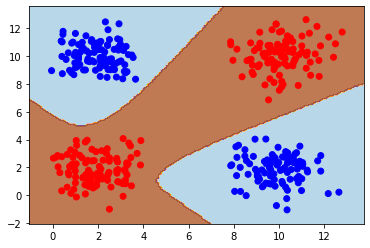

In [21]:
import matplotlib.colors as clr


index = accs.index(max(accs))
print(index)
print(accs[index])
W1, W2 = weights[index]

def plot_decision_boundary(X, y, W1, W2, points = True, h = 0.1):
  x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
  y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
  grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
  ones = np.transpose(np.ones((np.shape(xx)[1]*np.shape(xx)[0],1)))
  grid_data = np.vstack((grid_data,ones))
  Z = forward(grid_data, W1, W2) > 0
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  if points:
    plt.scatter(X[0, :], X[1, :],c= y, cmap=clr.ListedColormap(['blue','red']))
  plt.show()

plot_decision_boundary(x, y, W1, W2)

## **Function approximation**

0.0008101758703121556


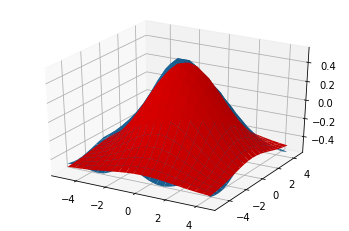

In [22]:
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
z = np.exp(-0.1*x*x) * np.exp(-0.1*y*y) - 0.5
[xx, yy] = np.meshgrid (x, y)
zz = np.exp(-0.1*xx**2) * np.exp(-0.1*yy**2) - 0.5
n_data = len(x)*len(y)
xx = xx.reshape(1, n_data)
yy = yy.reshape(1, n_data)
zz = zz.reshape(n_data)



patterns = np.vstack((xx, yy))
targets = zz

# add bias
patterns = np.vstack((patterns, np.ones(n_data)))
#traning

W1, W2 = backpropagation(patterns, targets, 25, 100, 0.9, 0.01)

#predict
out = forward(patterns, W1, W2)
print(np.mean((zz-out)**2))
# Plot the predictions in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx.reshape(len(x), len(y)),yy.reshape(len(x), len(y)),out.reshape(len(x), len(y)))
surf_1 = ax.plot_surface(xx.reshape(len(x), len(y)),yy.reshape(len(x), len(y)),zz.reshape(len(x), len(y)), color = 'red')
plt.show()

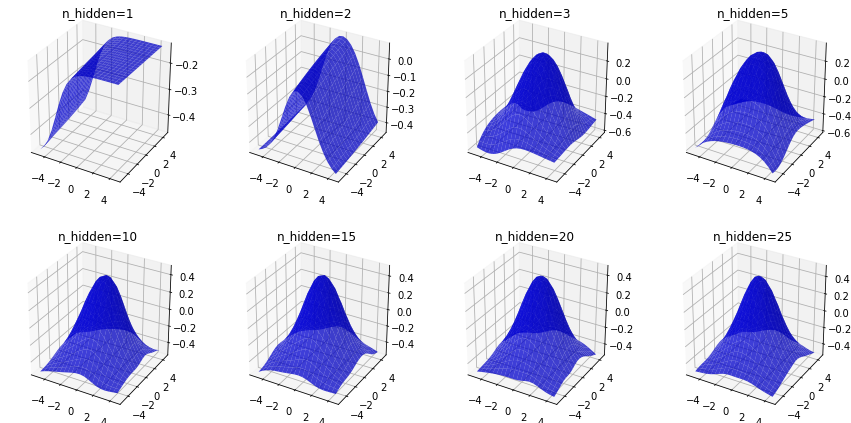

In [24]:
n_hidden_list = [1, 2,3,5,10,15,20,25]
fig = plt.figure(figsize=(15,7.5))
plot = 1
for n_hidden in n_hidden_list:
    W1, W2 = backpropagation(patterns, targets, n_hidden, 1000, 0.9, 0.01)
    #predict
    out = forward(patterns, W1, W2)
    # Plot the predictions in 3D
    ax3d = fig.add_subplot(2, 4, plot, projection='3d')
    plot += 1
    ax3d.plot_surface(xx.reshape(len(x), len(y)), yy.reshape(len(x), len(y)), out.reshape(len(x), len(y)), color="blue", 
                      alpha=0.75, label="Predictions")
    ax3d.set_title("n_hidden="+str(n_hidden))

In [ ]:
def split(X, y, size=0.2):
  indices = np.random.permutation(X.shape[1])
  n = int((1 - size)*X.shape[1])
  training_idx, val_idx = indices[:n], indices[n:]
  X_training, X_val = X[:, training_idx], X[:, val_idx]
  y_training, y_val = y[training_idx], y[val_idx]
  return X_training, X_val, y_training, y_val



def compute_error_training_validation(X_training, X_validation, y_training, y_validation, n_hidden, n_epochs, momentum, lr, scenario=1):
  MSE_training = []
  MSE_validation = []
  # initializate weights
  delta_weights1, delta_weights2 = 0, 0
  W1 = init_weights(X_training.shape[0], n_hidden)
  W2 = init_weights(n_hidden + 1)
  W2 = W2.reshape(1, n_hidden + 1)
  for i in range(n_epochs):
    # Forward pass
    hin = W1 @ X_training
    hout = activation(hin)
    #add Bias
    hout = np.vstack((hout, np.ones(hout.shape[1])))
    oin = W2 @ hout
    out = activation(oin)
    # Backward pass
    delta_o = (out - y_training)*activation_derivate(out)
    delta_h = (W2.T @ delta_o)*activation_derivate(hout)
    # remove bias from delta_h
    delta_h = delta_h[range(n_hidden), :]
    # update weights
    delta_weights1 = (delta_weights1*momentum)-(delta_h@X_training.T)*(1-momentum)
    delta_weights2 = (delta_weights2*momentum)-(delta_o@hout.T)*(1-momentum)
    W1 = W1 + lr * delta_weights1
    W2 = W2 + lr * delta_weights2
    #compute MSE_training
    MSE_training.append(np.mean((out -y_training)**2))
    #compute MSE_validation
    out_validation = forward(X_validation, W1, W2)
    MSE_validation.append(np.mean((out_validation -y_validation)**2))
  return MSE_training, MSE_validation



validation_size = [0.2, 0.4, 0.6, 0.8]
mean_t, sd_t = [], []
mean_v, sd_v = [], []
n_hidden = 20
for size in validation_size:
  X_training, X_val, y_training, y_val = split(patterns, targets, size)
  MSE_training, MSE_validation = compute_error_training_validation(X_training, X_val, y_training, y_val, n_hidden, n_epochs, momentum, 0.001, 1)
  mean_t.append(np.mean(MSE_training))
  mean_v.append(np.mean(MSE_validation))
  sd_t.append(np.sqrt(np.mean(abs(MSE_training - np.mean(MSE_training))**2)))
  sd_v.append(np.sqrt(np.mean(abs(MSE_validation - np.mean(MSE_validation))**2)))

print(mean_t)
print(sd_t)
print(mean_v)
print(sd_v)

In [ ]:
print(MSE_validation)

# **Assignement - Part II**

In [ ]:
#Mackey-Glass Time Series
T = 1506
x = [1.5]
for t0 in range(1,25):
    x.append(0.9*x[t0-1])
for t0 in range(25,T):
    x.append(0.9*x[t0-1] + (0.2*x[t0-26])/(1+(x[t0-26])**10) )
x = np.array(x)
plt.plot(x)

In [ ]:
N_inputs = 1200
t = np.array(range(301,1501))
input = np.matrix([x[t-20], x[t-15],x[t-10], x[t-5] ]).reshape(1200,4)
output = x[t+5]

input_test = input[1000:1200,]
output_test = output[1000:1200]

input_train_val = input[:1000,]
output_train_val = output[:1000,]

input_train = input[:700,]
output_train = output[:700,]
input_val = input[700:1000,]
output_val = output[700:1000,]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
import keras

model = Sequential()
model.add(Dense(8, input_shape=(4,), activation='sigmoid'))
model.add(Dense(9, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.0001))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)
history = model.fit(input_train, output_train,  validation_data=(input_val, output_val),
          epochs=250, batch_size=50, verbose=0, callbacks=[es] )

# evaluate the model
train_err = model.evaluate(input_train, output_train, verbose=0)
test_err = model.evaluate(input_test, output_test, verbose=0)
print('train mse: %.3f, test mse: %.3f' % (train_err, test_err))

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.savefig("plot1.png")

In [ ]:
def percep(nh1, nh2):
    model = Sequential()
    model.add(Dense(nh1, input_shape=(4,), activation='sigmoid'))
    model.add(Dense(nh2, activation='sigmoid'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.0001))
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)
    history = model.fit(input_train, output_train,  validation_data=(input_val, output_val),
            epochs=250, batch_size=50, verbose=0, callbacks=[es] )

    return history.history['val_loss'][-1]

nh1, nh2 = np.array(range(2,10)), np.array(range(2,10))
NH1, NH2 = np.meshgrid(nh1, nh2)
loss = np.zeros((len(nh1), len(nh2)))
for i1, nh1_v in enumerate(nh1):
    for i2, nh2_v in enumerate(nh2):
        loss[i1,i2] = percep(nh1_v, nh2_v)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(NH1, NH2, loss)
plt.xlabel('NH1')
plt.ylabel('NH2')
plt.show()

In [ ]:
# Plot the predictions in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx.reshape(len(x), len(y)),yy.reshape(len(x), len(y)),out.reshape(len(x), len(y)))
surf_1 = ax.plot_surface(xx.reshape(len(x), len(y)),yy.reshape(len(x), len(y)),zz.reshape(len(x), len(y)), color = 'red')
plt.show()